#### Тестовое задание 2 (часть 2)
Соколова Ирина 09/10/2020

### Прогноз продаж на следующие три месяца

К вам поступила информация о числе заказов за прошедшие 3 месяца с разрешением по неделям. Постройте (если это возможно) прогноз продаж на следующие 3 месяца, с учётом того, что в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%

    Дата	 Число заказов
    2020-01-05	650
    2020-01-12	837
    2020-01-19	1020
    2020-01-26	1176
    2020-02-02	1489
    2020-02-09	1823
    2020-02-16	1991
    2020-02-23	2166
    2020-03-01	2334
    2020-03-08	2607
    2020-03-15	2734
    2020-03-22	3492
    2020-03-29	3608
    2020-04-05	3857

In [1]:
# импорт библиотек
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
#читаем файл
df = pd.read_csv('/Users/vasilisa/Downloads/orders_.csv', sep = '\t', index_col = False, header = None, names = ['date', 'sales'])
df['date'] = pd.to_datetime(df['date'])

In [3]:
df.dtypes

date     datetime64[ns]
sales             int64
dtype: object

In [4]:
df

,date,sales
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


In [5]:
# добавляем колонку с TimeStamp
df['ts'] = df[['date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [6]:
df.head(3)

,date,sales,ts
0,2020-01-05,650,1578182400
1,2020-01-12,837,1578787200
2,2020-01-19,1020,1579392000


#### Линейная регрессия
для построения предсказательной модели будем использовать линейную регрессию
библиотека sckit-learn

In [7]:
# Даты на которые нам нужно предсказать продажи
x_ = ['2020-04-12','2020-04-19','2020-04-26','2020-05-03','2020-05-10','2020-05-17','2020-05-24',
      '2020-05-31','2020-06-07','2020-06-14','2020-06-21','2020-06-28','2020-07-05']

In [8]:
# Переводим даты в TimeStamp
x_ = [int(datetime.datetime.strptime(i, '%Y-%m-%d').strftime("%s")) for i in x_]

In [9]:
# Для использования дат в линейной регрессии требуется изменить shape данных
x_ = np.array(x_).reshape(13,1)

Slope: [[0.00040927]]
Intercept: [-645381.00973312]
Root mean squared error:  17678.1541601276
R2 score:  0.9825538022955196


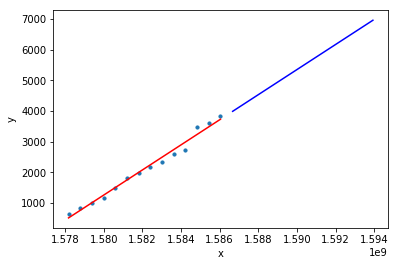

In [10]:
# Создаем numpy arrays для x (independent) and y (dependent)  
y = df.sales.values.reshape(-1,1)
x = df.ts.values.reshape(-1,1)

# вызываем модель
regression_model = LinearRegression()
# Тренеруем модель
regression_model.fit(x, y)
# Предсказываем 
y_predicted = regression_model.predict(x)
y_predicted_new = regression_model.predict(x_)

# проверяем модель
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.plot(x_, y_predicted_new, color='b')
plt.show()

Видим высокий R2-score 98%  R² объясняет, насколько вариативность данных "объясняется" моделью.
насколько можно доверять этой модели

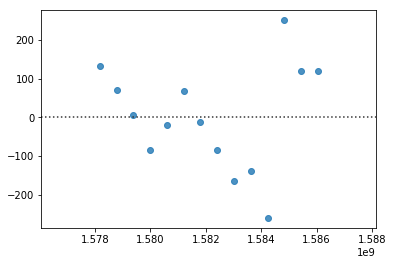

In [11]:
# Посмотрим на распределение остатков
sns.residplot(x, y)
plt.show()

In [12]:
# Вот наши финальные предсказания числа заказов по предстоящим неделям
y_predicted_new

array([[3994.18168498],
       [4241.70695971],
       [4489.23223443],
       [4736.75750916],
       [4984.28278388],
       [5231.80805861],
       [5479.33333333],
       [5726.85860806],
       [5974.38388278],
       [6221.90915751],
       [6469.43443223],
       [6716.95970696],
       [6964.48498168]])

### Вывод:
    Для пресказания числа заказов в ближайшие три месяца использовалась Простая линейная регрессия
    Функция, которая отображает зависимость одних переменных или данных от других.
    Высокий R2-score 98%  и равномерное распределение остатков говорят о хорошей предсказательной силе модели
    В результате получены прогнозируемые числа заказов по неделям y_predicted_new